In [140]:
# check for data file
import os

In [141]:
print(os.listdir())

['.ipynb_checkpoints', '911.csv', 'Project 911.ipynb']


In [142]:
# import all major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# usage of inline plotting
%matplotlib inline

In [144]:
# load data from CSV file
dataFrame = pd.read_csv('911.csv')

In [145]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [146]:
# check head for dataframe
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [147]:
# Top 5 zipcodes
dataFrame['zip'].value_counts().head()

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [148]:
# Top 5 twp reaching to 911
dataFrame['twp'].value_counts().head()

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [149]:
# Total Unique reasons mentioned in title
dataFrame['title'].nunique()

131

In [150]:
# Top 5 specific reasons to call 911
dataFrame['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    68123
Traffic: DISABLED VEHICLE -    20667
Fire: FIRE ALARM               16303
EMS: RESPIRATORY EMERGENCY     14636
EMS: FALL VICTIM               14580
Name: title, dtype: int64

In [151]:
# Top 5 specific reasons to call 911
dataFrame['SpecificReason'] = dataFrame['title'].apply(lambda title : title.split(':')[1])

In [152]:
dataFrame['SpecificReason'].value_counts().head(10)

 VEHICLE ACCIDENT -       68123
 DISABLED VEHICLE -       20667
 VEHICLE ACCIDENT         16747
 FIRE ALARM               16359
 RESPIRATORY EMERGENCY    14637
 FALL VICTIM              14584
 CARDIAC EMERGENCY        14491
 ROAD OBSTRUCTION -        8767
 SUBJECT IN PAIN           8151
 HEAD INJURY               7613
Name: SpecificReason, dtype: int64

In [153]:
dataFrame['BroadCategoryReason'] = dataFrame['title'].apply(lambda title : title.split(':')[0])

In [154]:
dataFrame['BroadCategoryReason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: BroadCategoryReason, dtype: int64

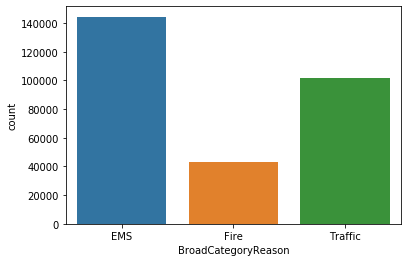

In [155]:
# Plot a countplot for a BroadCategoryReason
sns.countplot(x='BroadCategoryReason', data=dataFrame)

In [156]:
dataFrame

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadCategoryReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS
...,...,...,...,...,...,...,...,...,...,...,...
289235,40.024967,-75.282905,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB; ...,NaN,EMS: VEHICLE ACCIDENT,2017-12-30 11:11:36,LOWER MERION,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB,1,VEHICLE ACCIDENT,EMS
289236,40.024967,-75.282905,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB; ...,NaN,Fire: VEHICLE ACCIDENT,2017-12-30 11:11:30,LOWER MERION,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB,1,VEHICLE ACCIDENT,Fire
289237,40.107918,-75.163347,EDGE HILL RD & LIMEKILN PIKE; ABINGTON; 2017-1...,19038.0,Traffic: VEHICLE ACCIDENT -,2017-12-30 11:15:24,ABINGTON,EDGE HILL RD & LIMEKILN PIKE,1,VEHICLE ACCIDENT -,Traffic
289238,40.061922,-75.117655,COVENTRY AVE & NEW SECOND ST; CHELTENHAM; 2017...,19027.0,Traffic: DISABLED VEHICLE -,2017-12-30 11:12:03,CHELTENHAM,COVENTRY AVE & NEW SECOND ST,1,DISABLED VEHICLE -,Traffic


In [157]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   lat                  289240 non-null  float64
 1   lng                  289240 non-null  float64
 2   desc                 289240 non-null  object 
 3   zip                  253942 non-null  float64
 4   title                289240 non-null  object 
 5   timeStamp            289240 non-null  object 
 6   twp                  289137 non-null  object 
 7   addr                 289240 non-null  object 
 8   e                    289240 non-null  int64  
 9   SpecificReason       289240 non-null  object 
 10  BroadCategoryReason  289240 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 24.3+ MB


In [158]:
# Convert type of timeStamp from object to datetime64[ns]
dataFrame['timeStamp'] = pd.to_datetime(dataFrame['timeStamp'])

In [159]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   lat                  289240 non-null  float64       
 1   lng                  289240 non-null  float64       
 2   desc                 289240 non-null  object        
 3   zip                  253942 non-null  float64       
 4   title                289240 non-null  object        
 5   timeStamp            289240 non-null  datetime64[ns]
 6   twp                  289137 non-null  object        
 7   addr                 289240 non-null  object        
 8   e                    289240 non-null  int64         
 9   SpecificReason       289240 non-null  object        
 10  BroadCategoryReason  289240 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 24.3+ MB


In [160]:
type(dataFrame['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

# Create 3 New columns such as Hour, Month and Day of week

In [161]:
dataFrame['Hour'] = dataFrame['timeStamp'].apply(lambda time : time.hour)

In [162]:
dataFrame.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadCategoryReason,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17


In [163]:
dataFrame['Month'] = dataFrame['timeStamp'].apply(lambda time : time.month)

In [164]:
dataFrame['Day'] = dataFrame['timeStamp'].apply(lambda time : time.dayofweek)

In [165]:
dataFrame.tail(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadCategoryReason,Hour,Month,Day
289239,40.098662,-75.352777,DEKALB PIKE & W BORO LINE RD; UPPER MERION; 20...,19406.0,Traffic: VEHICLE ACCIDENT -,2017-12-30 11:14:31,UPPER MERION,DEKALB PIKE & W BORO LINE RD,1,VEHICLE ACCIDENT -,Traffic,11,12,5


In [166]:
dataFrame['Hour'].nunique()

24

In [167]:
# Plot a graph for a month

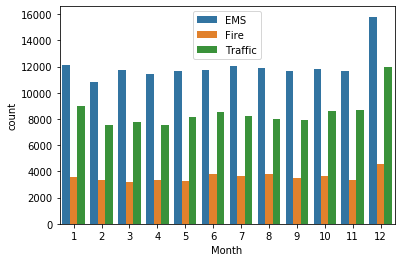

In [168]:
sns.countplot(x='Month', hue="BroadCategoryReason", data=dataFrame)
plt.legend(loc='upper center')

In [169]:
# Use GroupBy 
byMonth = dataFrame.groupby('Day').count()

In [170]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadCategoryReason,Hour,Month
Day,,,,,,,,,,,,,
0,42092,42092,42092,37030,42092,42092,42081,42092,42092,42092,42092,42092,42092
1,43744,43744,43744,38385,43744,43744,43731,43744,43744,43744,43744,43744,43744
2,43442,43442,43442,38327,43442,43442,43422,43442,43442,43442,43442,43442,43442
3,42784,42784,42784,37616,42784,42784,42770,42784,42784,42784,42784,42784,42784
4,44468,44468,44468,38923,44468,44468,44450,44468,44468,44468,44468,44468,44468
5,38637,38637,38637,33777,38637,38637,38623,38637,38637,38637,38637,38637,38637
6,34073,34073,34073,29884,34073,34073,34060,34073,34073,34073,34073,34073,34073


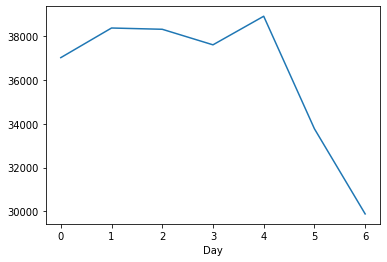

In [171]:
byMonth['zip'].plot()